In [2]:
import pandas as pd

# Path to the CSV file
file_path = r"C:\Users\nieve\exploratory-data-analysis---online-shopping-in-retail376\CSV FILES\transformed_data.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify everything is correct
df.head()


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.0,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False


In [ ]:
## PART 1: WHAT ARE OUR CUSTOMERS DOING?

In [ ]:
1. Are sales proportionally happening more on weekends?

In [5]:
# Calculate total sales on weekends and weekdays
weekend_sales = df[df["weekend"] == 1]["revenue"].sum()
weekday_sales = df[df["weekend"] == 0]["revenue"].sum()

# Calculate the percentage of weekend sales
weekend_percentage = (weekend_sales / (weekend_sales + weekday_sales)) * 100

print(f"Sales on weekends: {weekend_percentage:.2f}% of total sales")


Sales on weekends: 22.63% of total sales


In [ ]:
2. Which regions are generating the most revenue currently?

In [6]:
# Group by region and sum the revenue
region_revenue = df.groupby("region")["revenue"].sum().sort_values(ascending=False)

print("Regions with the most revenue:")
print(region_revenue)


Regions with the most revenue:
region
North America      753
Western Europe     323
Eastern Europe     195
Asia               187
Africa             130
South America      130
Northern Africa     91
Oceania             51
Southern Africa     49
Name: revenue, dtype: int64


In [ ]:
3. Is there any particular website traffic that stands out when generating sales?

In [7]:
# Group by traffic type and sum the revenue
traffic_sales = df.groupby("traffic_type")["revenue"].sum().sort_values(ascending=False)

print("Traffic sources with the most sales:")
print(traffic_sales)


Traffic sources with the most sales:
traffic_type
Google search          875
Facebook ads           266
Bing search            173
Instagram ads          172
Youtube channel         89
Affiliate marketing     83
Twitter                 65
Youtube ads             54
Instagram Page          46
Tik Tok ads             37
Direct Traffic          24
Facebook page           12
Yahoo Search             4
Newsletter               3
Other                    2
Tik Tok page             2
Pinterest                1
Yandex search            1
DuckDuckGo search        0
Name: revenue, dtype: int64


In [ ]:
4. What percentage of time is spent on the website performing administrative/product or informational related tasks?

In [11]:
df.loc[:, "total_duration"] = df["administrative_duration"] + df["product_related_duration"] + df["informational_duration"]

df.loc[:, "admin_percentage"] = df["administrative_duration"] / df["total_duration"] * 100
df.loc[:, "product_percentage"] = df["product_related_duration"] / df["total_duration"] * 100
df.loc[:, "info_percentage"] = df["informational_duration"] / df["total_duration"] * 100

avg_admin_time = df["admin_percentage"].mean()
avg_product_time = df["product_percentage"].mean()
avg_info_time = df["info_percentage"].mean()

print(f"Average time spent on administrative tasks: {avg_admin_time:.2f}%")
print(f"Average time spent on product-related tasks: {avg_product_time:.2f}%")
print(f"Average time spent on informational tasks: {avg_info_time:.2f}%")



Average time spent on administrative tasks: 8.73%
Average time spent on product-related tasks: 89.05%
Average time spent on informational tasks: 2.23%


In [ ]:
5. Are there any informational/administrative tasks which users spend time doing most?

In [12]:
# Find the average time spent on administrative and informational tasks
admin_avg = df["administrative_duration"].mean()
info_avg = df["informational_duration"].mean()

print(f"Average time on administrative tasks: {admin_avg:.2f} seconds")
print(f"Average time on informational tasks: {info_avg:.2f} seconds")


Average time on administrative tasks: 84.83 seconds
Average time on informational tasks: 34.61 seconds


In [ ]:
6. What is the breakdown of months making the most sales?

In [13]:
# Group by month and sum the revenue
monthly_sales = df.groupby("month")["revenue"].sum().sort_values(ascending=False)

print("Sales by month:")
print(monthly_sales)


Sales by month:
month
Nov     656
May     306
Dec     248
Mar     152
Oct     116
Aug      68
Sep      61
Jul      57
June     20
Feb       5
Name: revenue, dtype: int64


In [ ]:
## PART 2: DETERMINE WHAT SOFTWARE OUR CUSTOMER USE TO ACCESS THE WEBSITE

In [ ]:
Step 1: Count and Percentage of Operating Systems Used

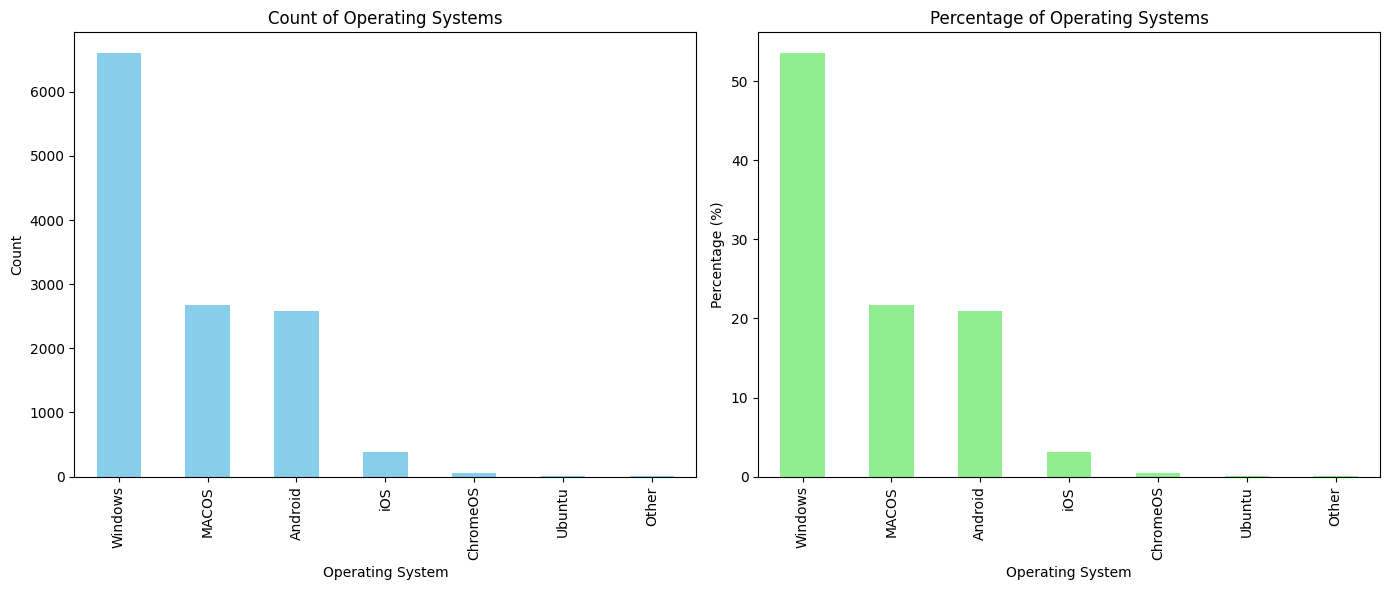

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\nieve\exploratory-data-analysis---online-shopping-in-retail376\CSV FILES\transformed_data.csv")

# Count the occurrences of each operating system
os_count = df['operating_systems'].value_counts()

# Calculate the percentage of the total
os_percentage = (os_count / len(df)) * 100

# Plotting the count of operating systems
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

os_count.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Count of Operating Systems')
ax[0].set_xlabel('Operating System')
ax[0].set_ylabel('Count')

# Plotting the percentage of operating systems
os_percentage.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Percentage of Operating Systems')
ax[1].set_xlabel('Operating System')
ax[1].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()


In [ ]:
Step 2: Mobile vs Desktop Operating Systems

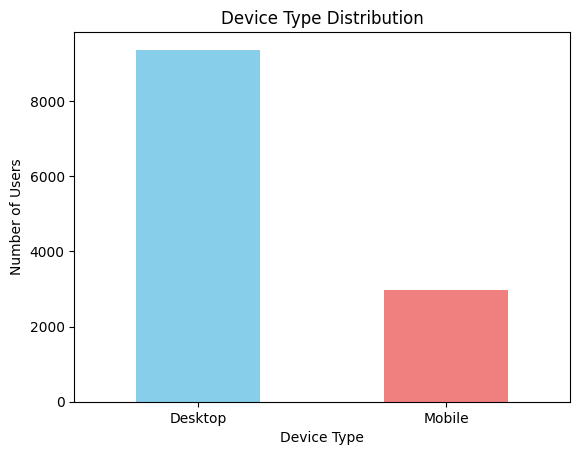

In [12]:
# Visualize the count of device types
import matplotlib.pyplot as plt

device_count.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


In [ ]:
Step 3: Most Commonly Used Browsers and Their Breakdown on Mobile vs Desktop

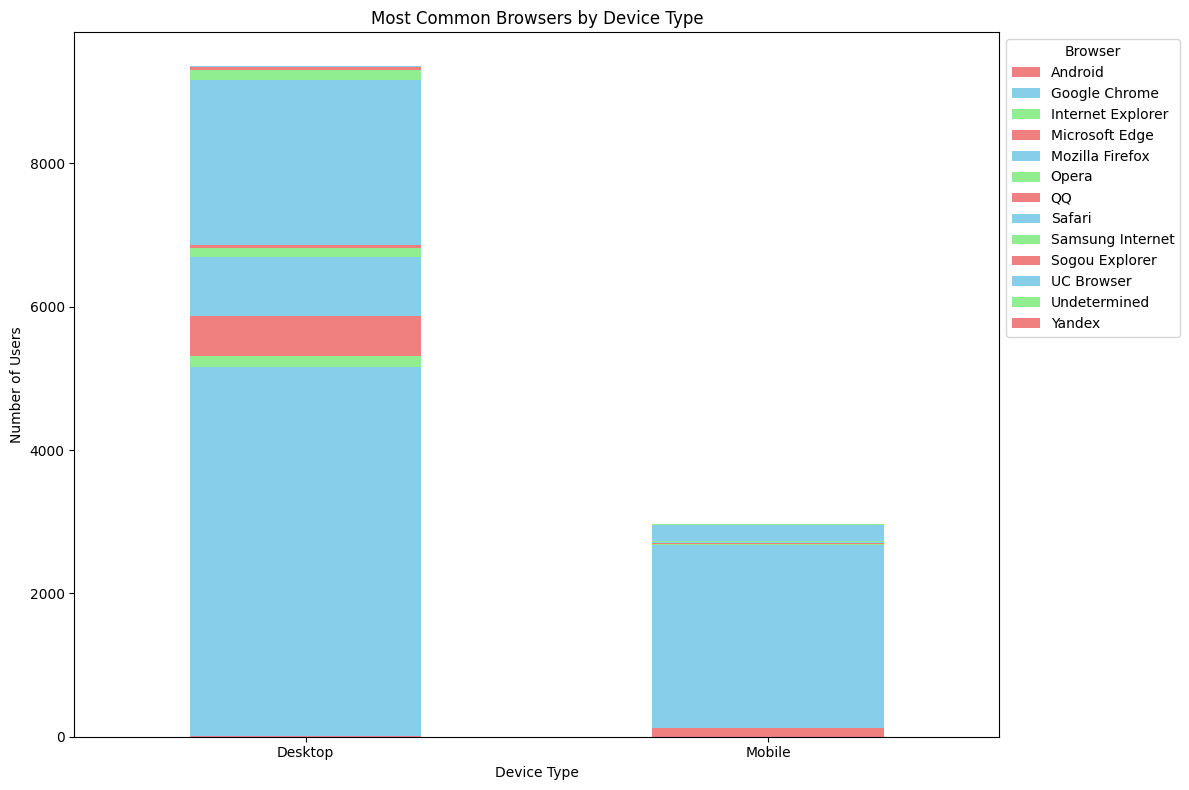

In [13]:
# Count the occurrences of each browser by device type
browser_device_count = df.groupby(['device_type', 'browser']).size().unstack().fillna(0)

# Plotting the browser usage breakdown by device type
browser_device_count.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Most Common Browsers by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title="Browser", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
Step 4: Regional Discrepancies in Operating System Usage

<Figure size 1400x800 with 0 Axes>

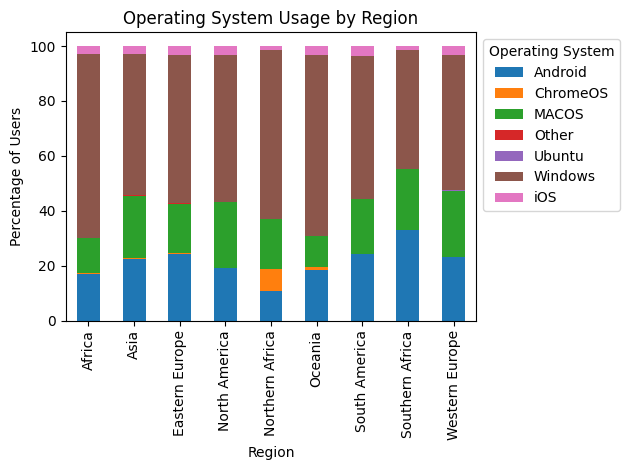

In [14]:
# Group by region and operating system
region_os_count = df.groupby(['region', 'operating_systems']).size().unstack().fillna(0)

# Normalize the data by region to see the percentage of operating systems used in each region
region_os_percentage = region_os_count.div(region_os_count.sum(axis=1), axis=0) * 100

# Plotting the regional discrepancies in OS usage
plt.figure(figsize=(14, 8))
region_os_percentage.plot(kind='bar', stacked=True)
plt.title('Operating System Usage by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Users')
plt.xticks(rotation=90)
plt.legend(title="Operating System", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


## PART 3: EFFECTIVE MARKETING

In [ ]:
Traffic Generating the Most Revenue by Region

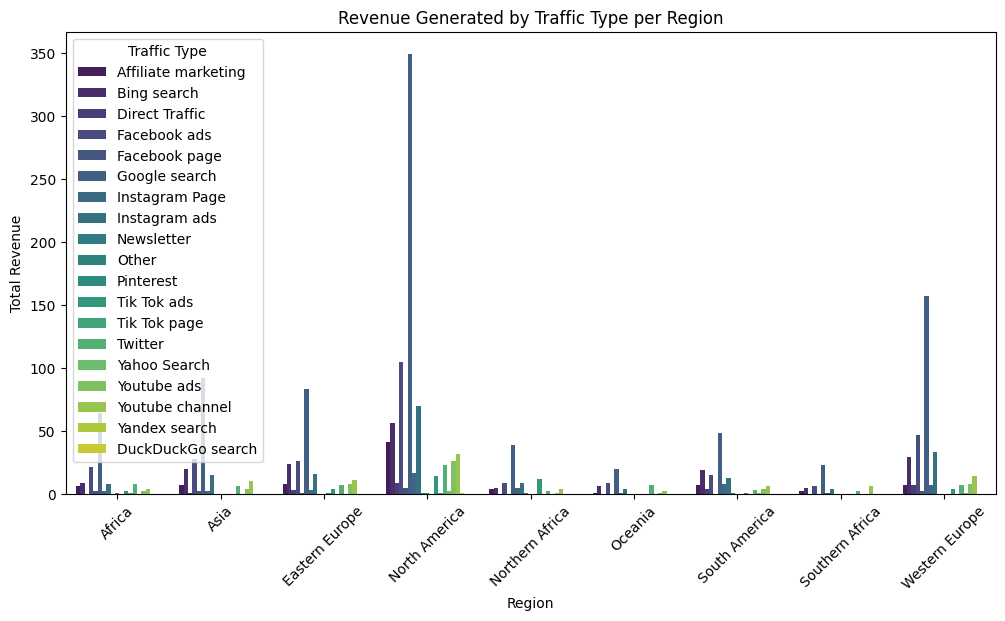

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename column for consistency (if needed)
df.columns = df.columns.str.strip()

# Ensure the correct columns exist before proceeding
if 'traffic_type' in df.columns and 'region' in df.columns and 'revenue' in df.columns:
    # Group by region and traffic type, summing up the revenue
    traffic_revenue = df.groupby(['region', 'traffic_type'])['revenue'].sum().reset_index()

    # Create a bar plot
    plt.figure(figsize=(12,6))
    sns.barplot(data=traffic_revenue, x='region', y='revenue', hue='traffic_type', palette='viridis')
    plt.title('Revenue Generated by Traffic Type per Region')
    plt.xlabel('Region')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.legend(title="Traffic Type")
    plt.show()
else:
    print("🚨 One or more required columns are missing!")


In [ ]:
Traffic with the Highest Bounce Rate by Region

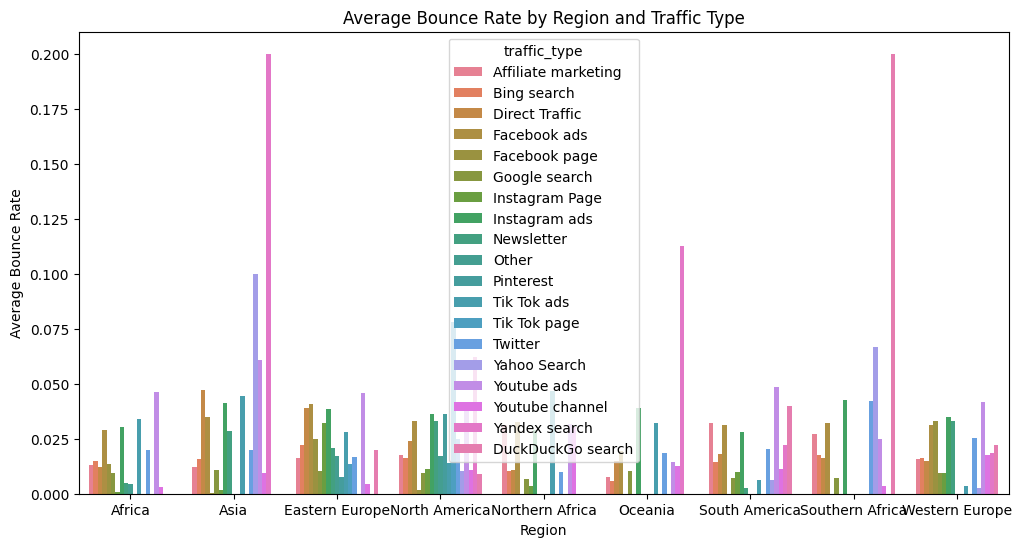

In [22]:
# Group data by region and traffic type, calculating the average bounce rate
bounce_rate_data = df.groupby(['region', 'traffic_type'])['bounce_rates'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=bounce_rate_data, x='region', y='bounce_rates', hue='traffic_type')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Average Bounce Rate')
plt.title('Average Bounce Rate by Region and Traffic Type')

# Show the plot
plt.show()


In [ ]:
Sales from Ads Traffic by Month

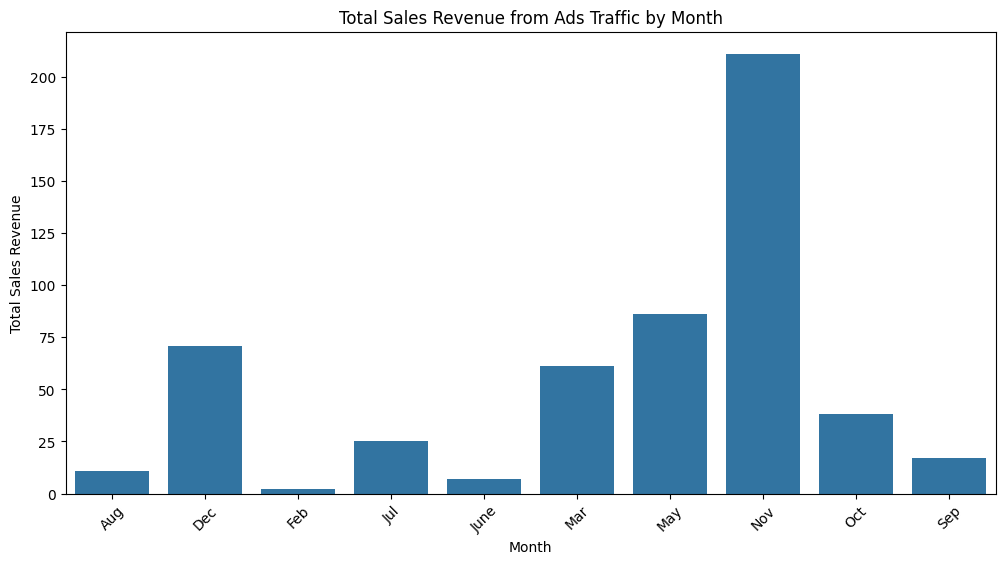

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the 'df' DataFrame loaded and ready to use

# Filter ad-related traffic
ads_sources = df[df['traffic_type'].str.contains('ads', case=False, na=False)]

# Group by month and sum the revenue
ads_sales_by_month = ads_sources.groupby('month')['revenue'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=ads_sales_by_month, x='month', y='revenue')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue from Ads Traffic by Month')
plt.xticks(rotation=45)
plt.show()


In [27]:
## PART 4: REVENUE GENERATED

In [ ]:
1. Which region is currently generating the most/least revenue?

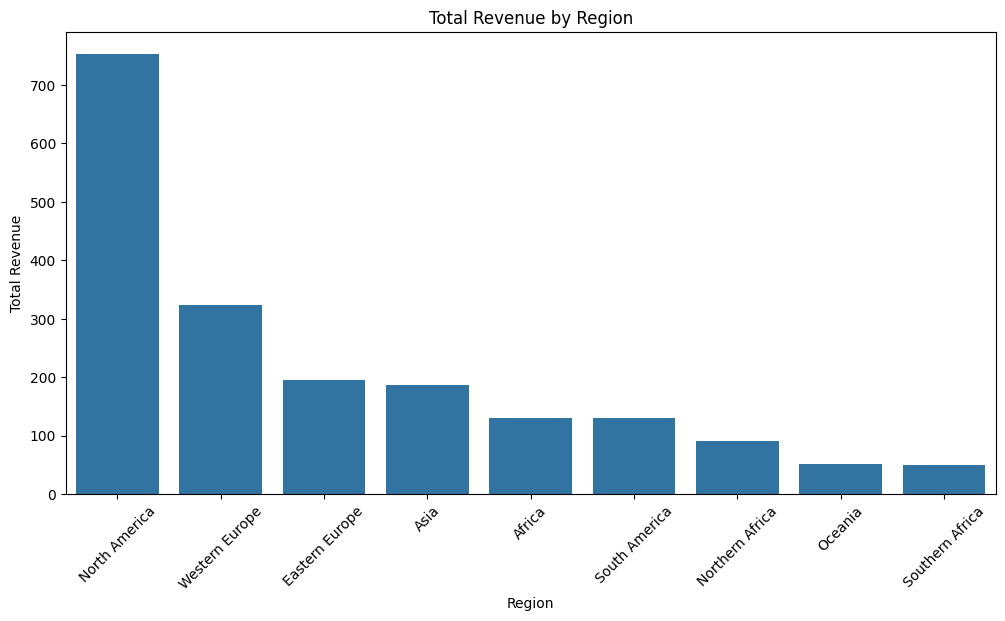

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'df' DataFrame loaded

# Group by region and sum the revenue
region_revenue = df.groupby('region')['revenue'].sum().reset_index()

# Sort the regions by revenue (descending order)
region_revenue = region_revenue.sort_values('revenue', ascending=False)

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=region_revenue, x='region', y='revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.show()


In [ ]:
2. What percentage of our returning/new customers are making a purchase when they visit the site?

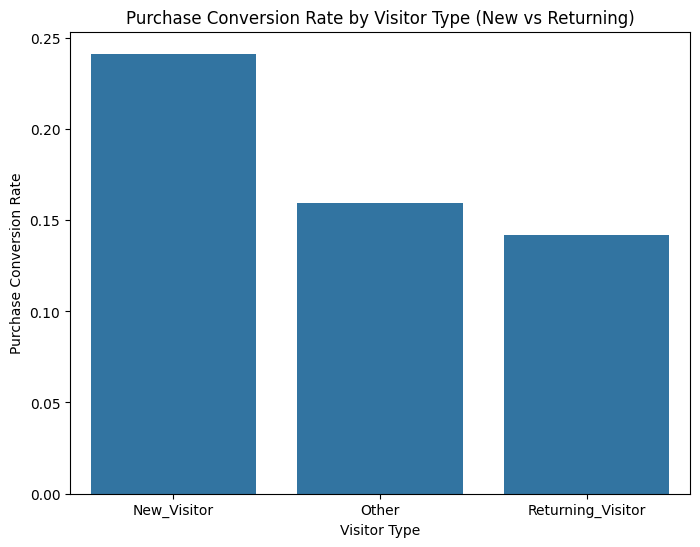

In [29]:
# Assuming 'visitor_type' has 'New' and 'Returning' categories and 'revenue' > 0 means a purchase was made

# Create a new column to indicate whether a purchase was made
df['purchase_made'] = df['revenue'] > 0

# Group by visitor_type and calculate the percentage of purchases made
conversion_rate = df.groupby('visitor_type')['purchase_made'].mean().reset_index()

# Create a bar plot for the conversion rates
plt.figure(figsize=(8,6))
sns.barplot(data=conversion_rate, x='visitor_type', y='purchase_made')
plt.xlabel('Visitor Type')
plt.ylabel('Purchase Conversion Rate')
plt.title('Purchase Conversion Rate by Visitor Type (New vs Returning)')
plt.show()


In [ ]:
3. Are sales being made more on weekends comparatively to weekdays?

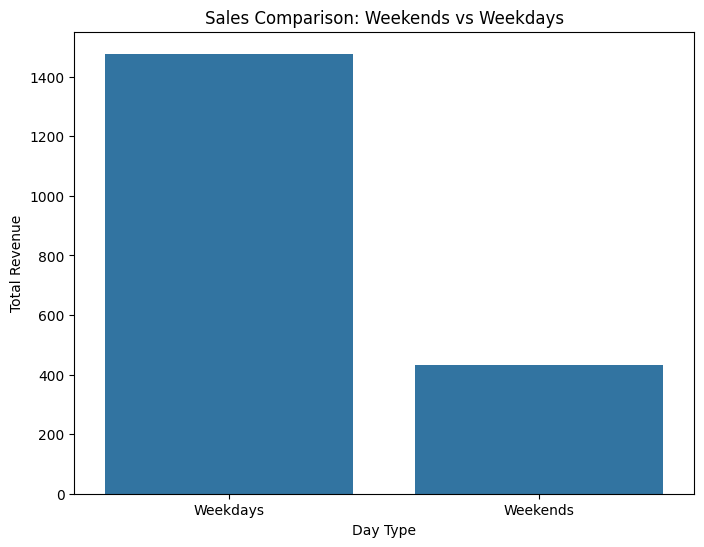

In [40]:
# Group by 'weekend' (True=Weekend, False=Weekday) and sum the revenue
weekend_sales = df.groupby('weekend')['revenue'].sum().reset_index()

# Map 'weekend' to labels for better clarity
weekend_sales['weekend'] = weekend_sales['weekend'].map({False: 'Weekdays', True: 'Weekends'})

# Create a bar plot to visualize the comparison
plt.figure(figsize=(8,6))
sns.barplot(data=weekend_sales, x='weekend', y='revenue')
plt.xlabel('Day Type')
plt.ylabel('Total Revenue')
plt.title('Sales Comparison: Weekends vs Weekdays')
plt.show()



In [ ]:
4. Which months have been the most effective for generating sales?

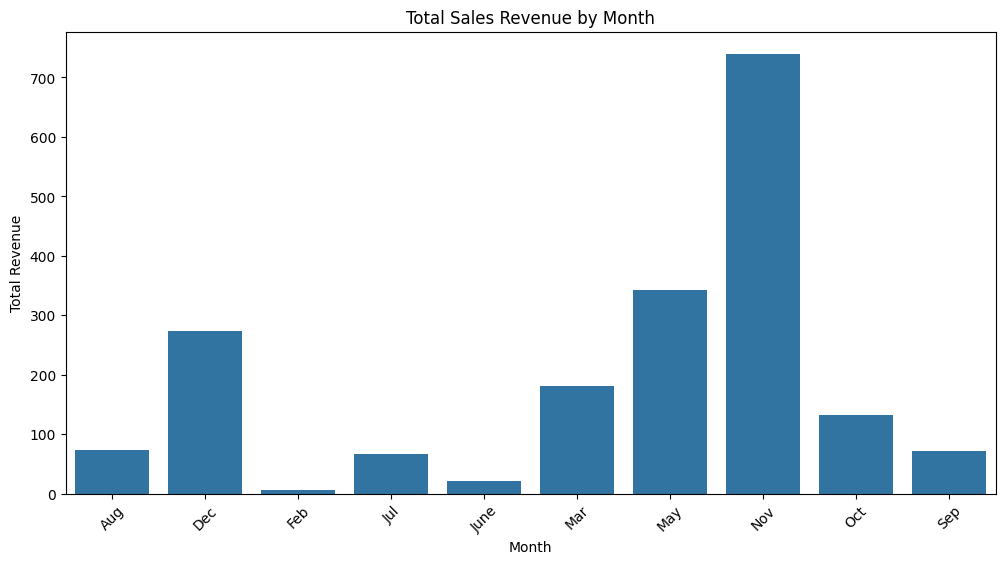

In [41]:
# Group by month and sum the revenue
monthly_sales = df.groupby('month')['revenue'].sum().reset_index()

# Create a bar plot to show total sales by month
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_sales, x='month', y='revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Sales Revenue by Month')
plt.xticks(rotation=45)
plt.show()


In [ ]:
5. Is direct/social or advertising traffic contributing heavily to sales?

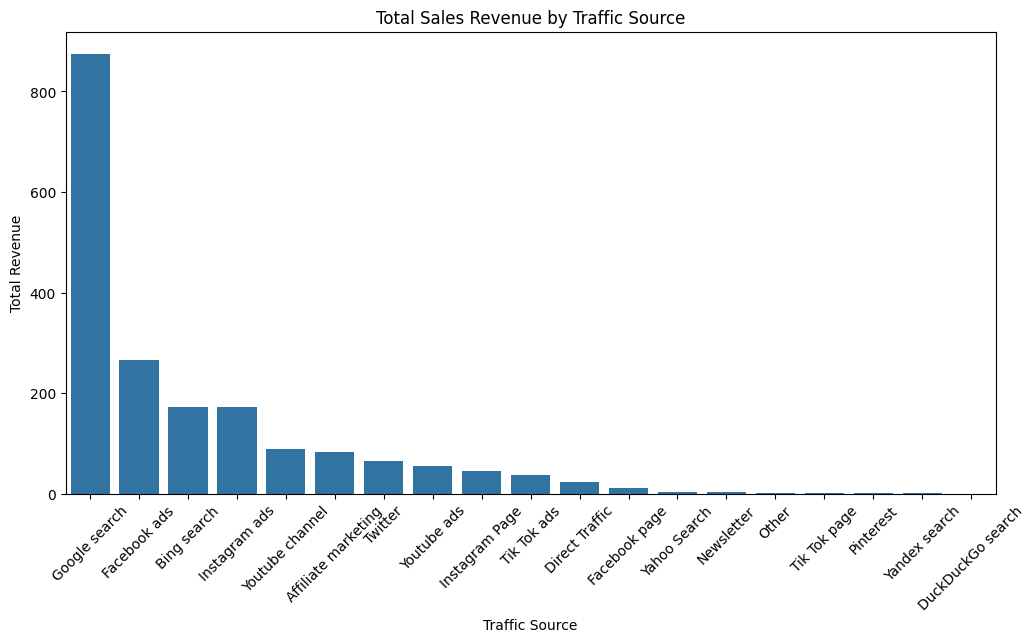

In [31]:
# Assuming 'traffic_type' contains different types like 'Direct Traffic', 'Facebook ads', etc.
traffic_sales = df.groupby('traffic_type')['revenue'].sum().reset_index()

# Sort by revenue to see which traffic source contributes the most
traffic_sales = traffic_sales.sort_values('revenue', ascending=False)

# Create a bar plot to show total sales by traffic source
plt.figure(figsize=(12,6))
sns.barplot(data=traffic_sales, x='traffic_type', y='revenue')
plt.xlabel('Traffic Source')
plt.ylabel('Total Revenue')
plt.title('Total Sales Revenue by Traffic Source')
plt.xticks(rotation=45)
plt.show()
